# Milestone 1: Puzzle Board Processing Pipeline
This notebook demonstrates preprocessing, segmentation, edge extraction, and descriptor computation.

Processing: 109.jpg
Saving to: 8x8\109
Slicing 8x8 grid...
Generating Visualization...
Extracting numeric features from 64 pieces...
Success! Edge signatures saved to '8x8\109\edge_signatures.json'


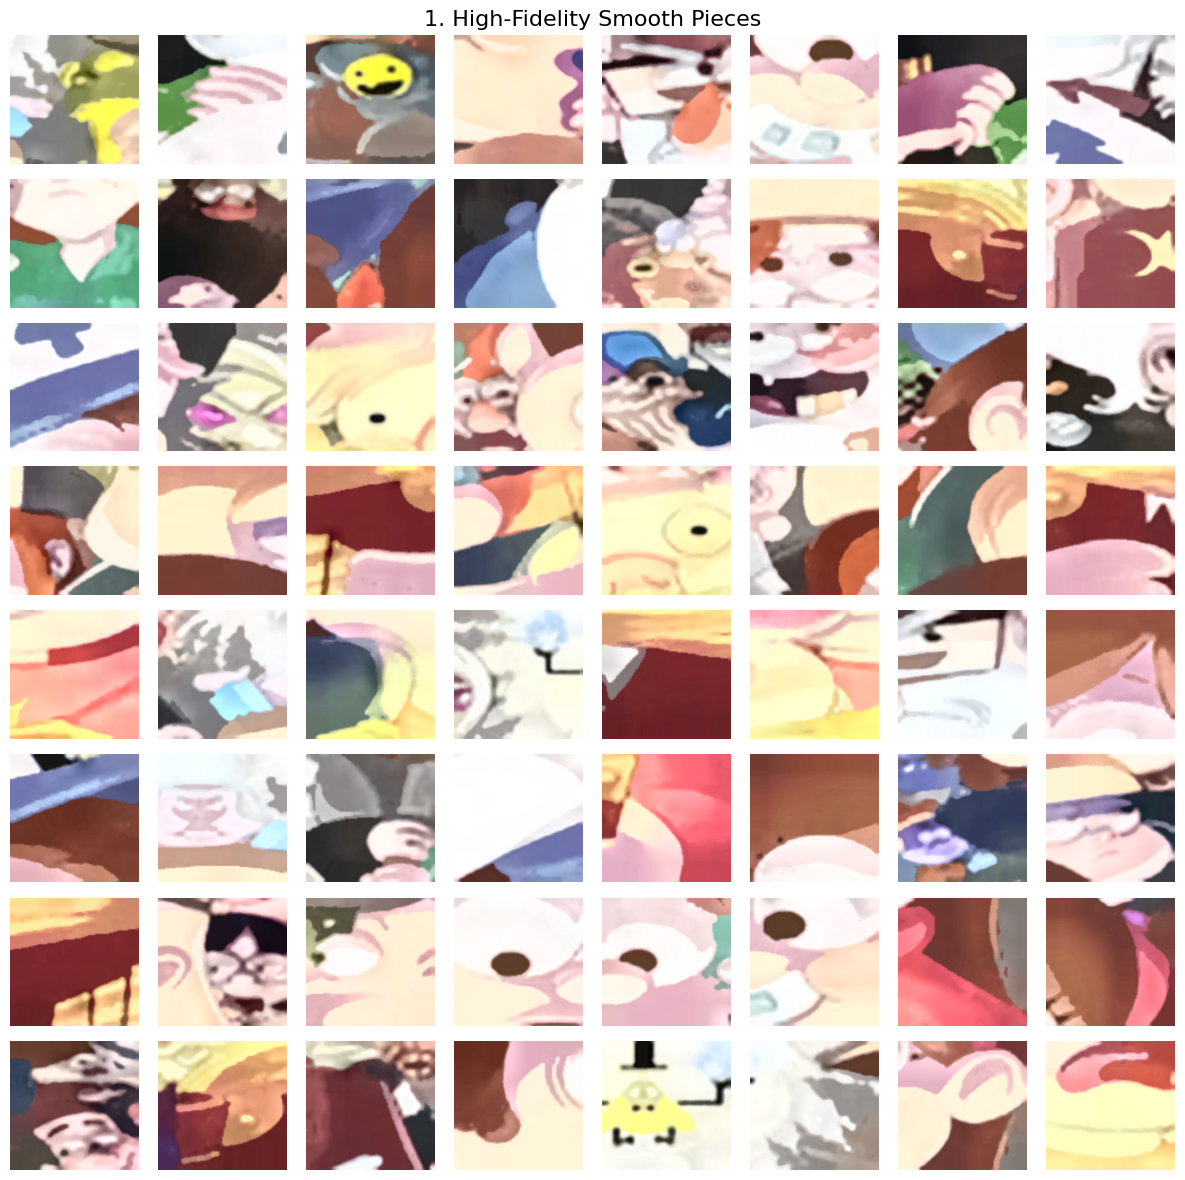

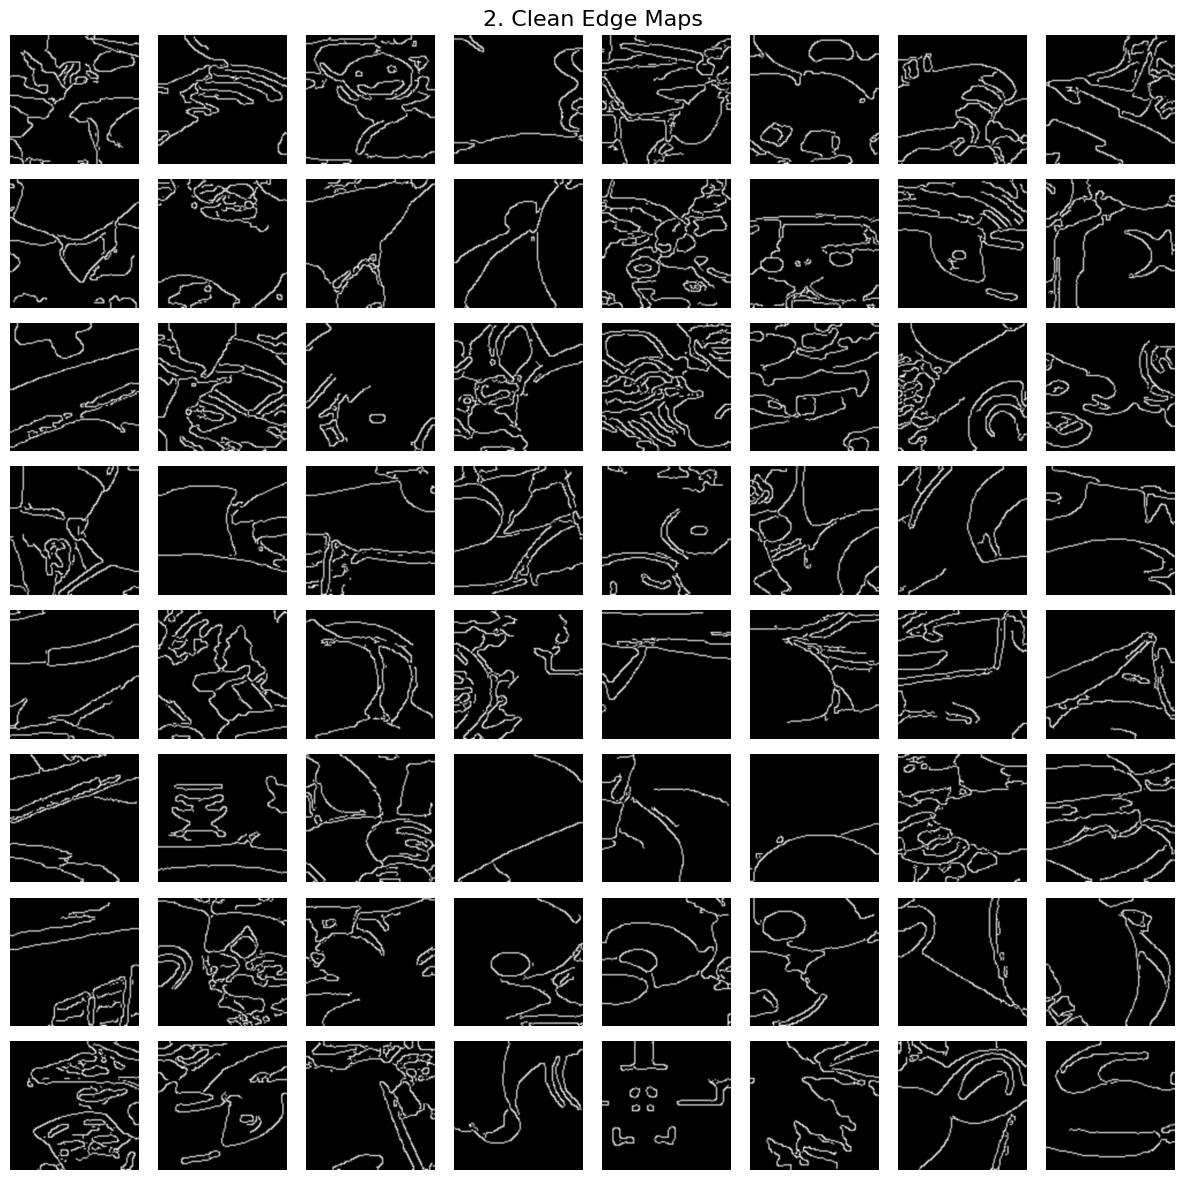

Done. Saved to '8x8\109'.


In [339]:
# =============================================================================
# Milestone 1: High-Fidelity Pipeline (Anti-Aliasing + Edge Detection)
# =============================================================================
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# 1. Utility
def save_image(path, img):
    cv2.imwrite(path, img)

# 2. Logic: Process a Single Piece
def process_single_piece(raw_piece, piece_id):
    h, w = raw_piece.shape[:2]

    # --- A. SUPER UPSCALING (4x) ---
    upscaled = cv2.resize(raw_piece, (w * 4, h * 4), interpolation=cv2.INTER_LANCZOS4)

    # --- B. MEAN SHIFT FILTERING ---
    smoothed = cv2.pyrMeanShiftFiltering(upscaled, sp=15, sr=40)

    # --- C. LIGHT ENHANCEMENT ---
    lab = cv2.cvtColor(smoothed, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(8,8))
    l_enhanced = clahe.apply(l)
    enhanced = cv2.cvtColor(cv2.merge((l_enhanced, a, b)), cv2.COLOR_LAB2BGR)

    # --- D. EDGE DETECTION ---
    gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    return enhanced, edges

# 3. Main Runner
def run_smooth_pipeline(image_path, grid_size=4, save_dir=None):

    # AUTO-DETECT PARENT FOLDER ("2x2", "4x4", "8x8")
    parent_folder = os.path.basename(os.path.dirname(image_path))

    # Extract image name WITHOUT extension → "0"
    img_name = os.path.splitext(os.path.basename(image_path))[0]

    # Target output dir: parent/image_name
    if save_dir is None:
        save_dir = os.path.join(parent_folder, img_name)

    os.makedirs(save_dir, exist_ok=True)

    print(f"Processing: {os.path.basename(image_path)}")
    print("Saving to:", save_dir)

    # Load
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found")

    h, w = img.shape[:2]
    p_h = h // grid_size
    p_w = w // grid_size

    final_color = []
    final_edges = []

    print(f"Slicing {grid_size}x{grid_size} grid...")

    for row in range(grid_size):
        for col in range(grid_size):

            y1, y2 = row * p_h, (h if row == grid_size - 1 else (row + 1) * p_h)
            x1, x2 = col * p_w, (w if col == grid_size - 1 else (col + 1) * p_w)

            raw_piece = img[y1:y2, x1:x2]
            p_id = f"{row}_{col}"

            color_res, edge_res = process_single_piece(raw_piece, p_id)

            save_image(f"{save_dir}/piece_{p_id}.png", color_res)
            save_image(f"{save_dir}/piece_{p_id}_edges.png", edge_res)

            final_color.append(color_res)
            final_edges.append(edge_res)

    print("Generating Visualization...")

    # Extract edge features
    def extract_edge_features(input_dir):
        image_paths = glob.glob(os.path.join(input_dir, "*.png"))
        image_paths = [p for p in image_paths if "edges" not in p]

        piece_data = {}

        print(f"Extracting numeric features from {len(image_paths)} pieces...")

        for path in image_paths:
            img = cv2.imread(path)
            name = os.path.splitext(os.path.basename(path))[0]

            top = img[0, :, :].flatten().tolist()
            bottom = img[-1, :, :].flatten().tolist()
            left = img[:, 0, :].flatten().tolist()
            right = img[:, -1, :].flatten().tolist()

            piece_data[name] = {
                "top": top,
                "bottom": bottom,
                "left": left,
                "right": right
            }

        output_file = os.path.join(input_dir, "edge_signatures.json")
        with open(output_file, "w") as f:
            json.dump(piece_data, f)

        print(f"Success! Edge signatures saved to '{output_file}'")

    extract_edge_features(save_dir)

    # Visualization 1
    plt.figure(figsize=(12, 12))
    plt.suptitle("1. High-Fidelity Smooth Pieces", fontsize=16)
    for i, res in enumerate(final_color):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), interpolation='bicubic')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Visualization 2
    plt.figure(figsize=(12, 12))
    plt.suptitle("2. Clean Edge Maps", fontsize=16)
    for i, res in enumerate(final_edges):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(res, cmap='gray', interpolation='bicubic')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Done. Saved to '{save_dir}'.")


# ==========================================
# Execution
# ==========================================
dataset_path = r"C:\Users\loaym\Downloads\Project-img\data\8x8\109.jpg"

if "4x4" in dataset_path.lower():
    GRID_SIZE = 4
elif "2x2" in dataset_path.lower():
    GRID_SIZE = 2
else:
    GRID_SIZE = 8

run_smooth_pipeline(dataset_path, grid_size=GRID_SIZE)


Processing: 6.jpg
Slicing 4x4 grid...


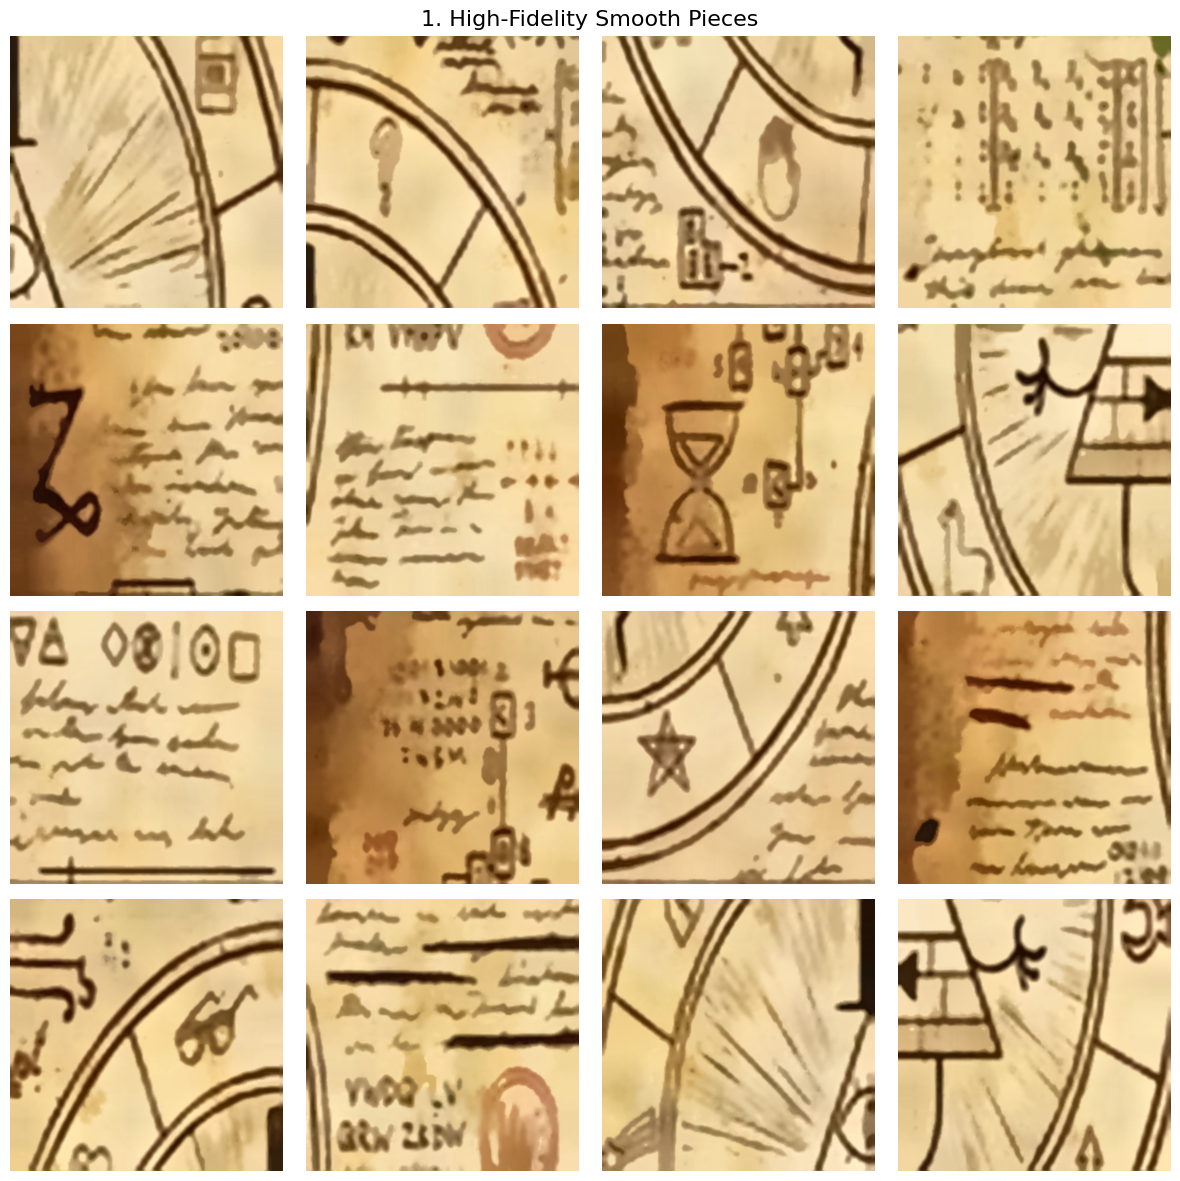

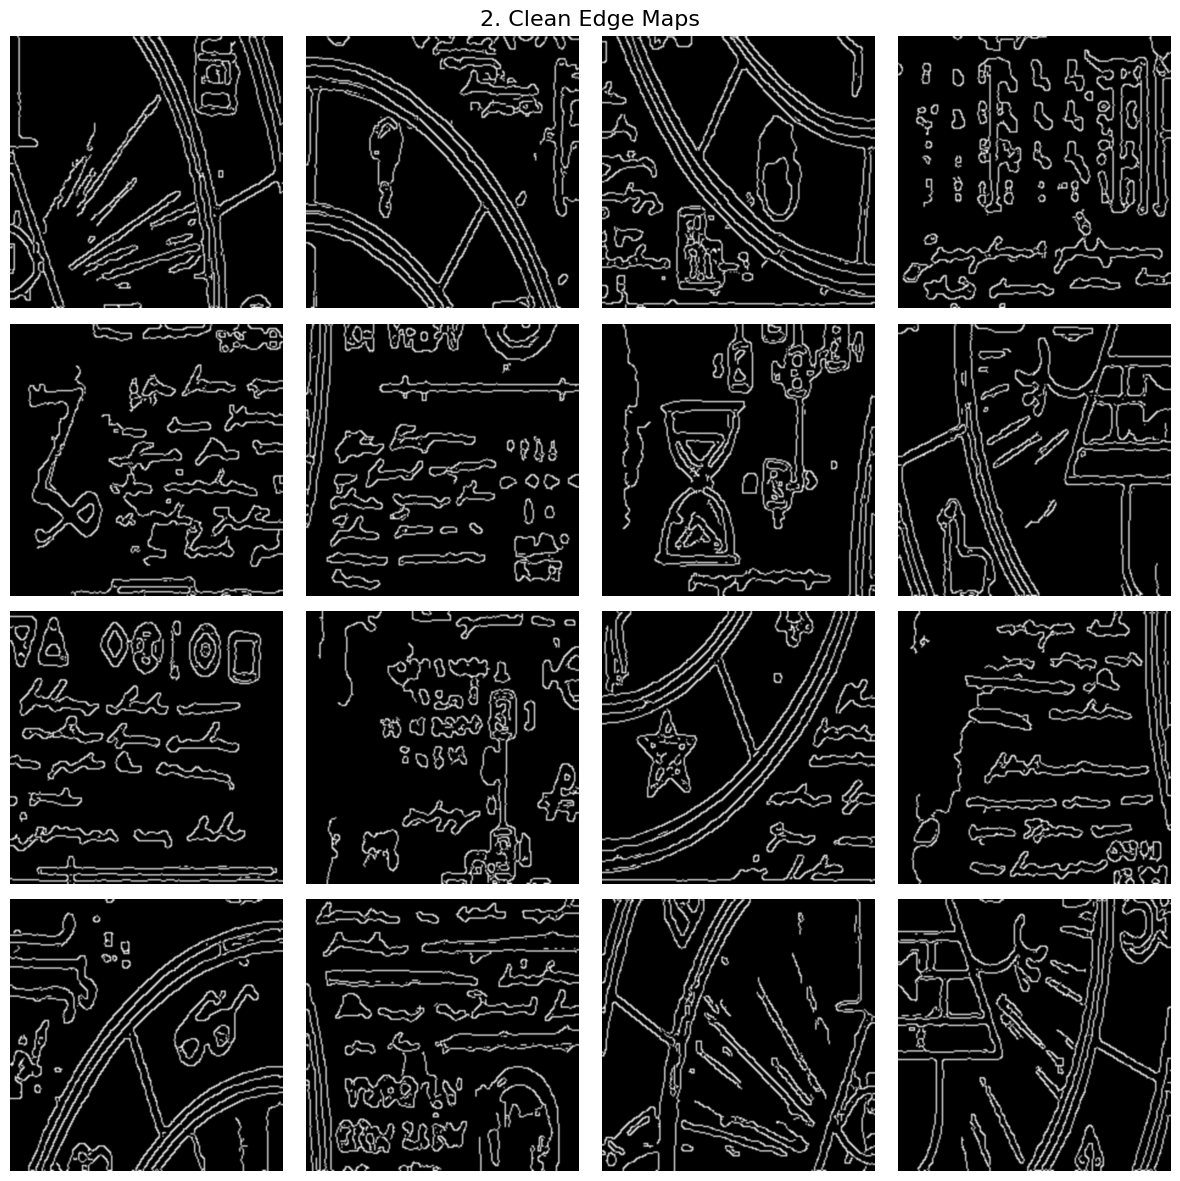

Done. Viewing complete.


In [ ]:
# =============================================================================
# Milestone 1: High-Fidelity Pipeline (Anti-Aliasing + Edge Detection) - [[[VIEW ONLY]]]
# =============================================================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob

# 1. Logic: Process a Single Piece
def process_single_piece(raw_piece):
    h, w = raw_piece.shape[:2]

    # --- A. SUPER UPSCALING (4x) ---
    upscaled = cv2.resize(raw_piece, (w * 4, h * 4), interpolation=cv2.INTER_LANCZOS4)

    # --- B. MEAN SHIFT FILTERING ---
    smoothed = cv2.pyrMeanShiftFiltering(upscaled, sp=15, sr=40)

    # --- C. LIGHT ENHANCEMENT ---
    lab = cv2.cvtColor(smoothed, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(8,8))
    l_enhanced = clahe.apply(l)
    enhanced = cv2.cvtColor(cv2.merge((l_enhanced, a, b)), cv2.COLOR_LAB2BGR)

    # --- D. EDGE DETECTION ---
    gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    return enhanced, edges

# 2. Main Runner
def run_smooth_pipeline_view(image_path, grid_size=4):

    print(f"Processing: {os.path.basename(image_path)}")

    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found")

    h, w = img.shape[:2]
    p_h = h // grid_size
    p_w = w // grid_size

    final_color = []
    final_edges = []

    print(f"Slicing {grid_size}x{grid_size} grid...")

    for row in range(grid_size):
        for col in range(grid_size):

            y1, y2 = row * p_h, (h if row == grid_size - 1 else (row + 1) * p_h)
            x1, x2 = col * p_w, (w if col == grid_size - 1 else (col + 1) * p_w)

            raw_piece = img[y1:y2, x1:x2]

            color_res, edge_res = process_single_piece(raw_piece)

            final_color.append(color_res)
            final_edges.append(edge_res)

    # Visualization 1: High-Fidelity Pieces
    plt.figure(figsize=(12, 12))
    plt.suptitle("1. High-Fidelity Smooth Pieces", fontsize=16)
    for i, res in enumerate(final_color):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), interpolation='bicubic')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Visualization 2: Clean Edge Maps
    plt.figure(figsize=(12, 12))
    plt.suptitle("2. Clean Edge Maps", fontsize=16)
    for i, res in enumerate(final_edges):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(res, cmap='gray', interpolation='bicubic')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("Done. Viewing complete.")

# ==========================================
# Execution
# ==========================================
dataset_path = r"C:\Users\loaym\Downloads\Project-img\data\4x4\6.jpg"

if "4x4" in dataset_path.lower():
    GRID_SIZE = 4
elif "2x2" in dataset_path.lower():
    GRID_SIZE = 2
else:
    GRID_SIZE = 8

run_smooth_pipeline_view(dataset_path, grid_size=GRID_SIZE)
